In [1]:
import geopandas as gpd
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 

#for the function: 
import geopy
import requests
from shapely.geometry import Point
from geopy.geocoders import Nominatim



In [2]:
os.chdir("C:\\Users\\Sanata\\Dropbox\\01AA_Insight Projects\\Restaurants")
pd.options.display.max_rows = 50

In [3]:
nyc = gpd.read_file('nyc_shape.shp') #nyc census blocks 


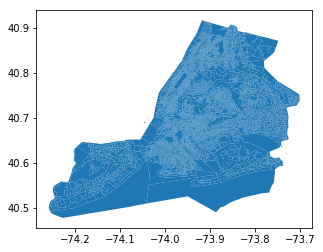

In [11]:
nyc.plot()

In [21]:
#make points 
address = "175 5th Avenue NYC"
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode(address)


In [22]:
location

Location(Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10010, USA, (40.7410861, -73.9896298241625, 0.0))

In [39]:
lat = float(location.raw['lat'])
lon = float(location.raw['lon'])
d = {'lat':lat, 'lon':lon}


In [40]:
coord = pd.DataFrame(d, index = np.arange(1))
coord

,lat,lon
0,40.741086,-73.98963


In [54]:
def get_coords(address):
    full_address = address + ' ' + 'New York City'
    geolocator= Nominatim(user_agent='my_app17', timeout=10000)
    location = geolocator.geocode(full_address)
    if location is None:
        return print('Address not found')
    else:
        lat = float(location.raw['lat'])
        lon = float(location.raw['lon'])
        df = pd.DataFrame({'lat':lat, 'lon':lon}, index = np.arange(1))
        return df 

In [61]:
get_coords('236 Sterling Street')

,lat,lon
0,40.66281,-73.953081


In [41]:
geom = coord.apply(lambda x : Point([x['lon'],x['lat']]), axis=1)

In [42]:
point = gpd.GeoDataFrame(coord, geometry=geom) #geom is a Series
point.crs = nyc.crs

In [43]:
geom

0    POINT (-73.98962982416251 40.7410861)
dtype: object

In [45]:
#merge with shapefile 
point_in_nyc = gpd.sjoin(point, nyc, op='within')
point_in_nyc

,lat,lon,geometry,index_right,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10
0,40.741086,-73.98963,POINT (-73.98962982416251 40.7410861),1091,36,061,005600,2,360610056002,Block Group 2,G5030,S,62163,0,+40.7414790,-073.9881325


In [ ]:
#convert to function 

In [ ]:
def address_in_block(address):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(address)
    lat = float(location.raw['lat'])
    lon = float(location.raw['lon'])
    coord = pd.DataFrame({'lat':lat, 'lon':lon}, index = np.arange(1))
    geom = coord.apply(lambda x : Point([x['lon'],x['lat']]), axis=1)
    point = gpd.GeoDataFrame(coord, geometry=geom) #geom is a Series
    point.crs = nyc.crs
    point_in_nyc = gpd.sjoin(point, nyc, op='within')
    return point_in_nyc.GEOID10 
    

In [95]:
#read subway entrances 
subway = gpd.read_file('geo_export_91732a86-b926-4a56-a45f-dfc72fe53d8a.shp')

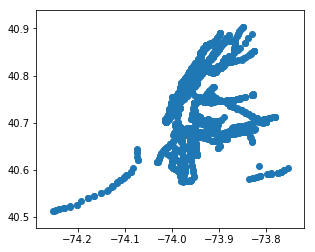

In [4]:
subway.plot()

In [4]:
#get restaurant coords
data = pd.read_pickle('restaurant_final_data')
data = data.drop_duplicates(['bus_name', 'Building_ID_No'])
data.head()

,Unnamed: 0,Source,License_Permit_Holder,Business_Description,License/Permit_Number,Permit_Type_Description,Permit_Subtype_Description,Permit_Issuance_Date,Permit_Expiration_Date,Permit_Status_Date,...,n_sales_250k,n_sales_500k,n_sales_999k,n_sales_1m,med_block_income,logpop,logpopdens,loginc,ztype__C,ztype__R
0,32769,DOHMH Permit,"PIZZA WORLD 163 ST., LLC",NaN,1349148.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,2012-05-09,2014-04-30,08/16/2013 00:00:00,...,0.333333,0.142857,0.111111,0.253968,30471.0,7.602900,8.516120,7.602900,0,0
1,37638,DOHMH Permit,RUNNING COOL II INC,NaN,1458006.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,2013-02-25,2014-02-28,02/22/2013 00:00:00,...,0.333333,0.142857,0.111111,0.253968,30471.0,7.602900,8.516120,7.602900,0,0
4,53108,DOHMH Permit,163 CHICKEN CORP,NaN,1372435.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,2012-07-24,2013-09-30,07/24/2012 00:00:00,...,0.333333,0.142857,0.111111,0.253968,30471.0,7.602900,8.516120,7.602900,0,0
5,54576,DOHMH Permit,TRIPLE A JAMAICAN RESTAURANT INC,NaN,1415409.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,2011-12-19,2012-12-31,01/14/2013 00:00:00,...,0.333333,0.142857,0.111111,0.253968,30471.0,7.602900,8.516120,7.602900,0,0
11,32770,DOHMH Permit,"UNCLE JACK'S STEAKHOUSE MIDTOWN, INC",NaN,1270552.0,FOOD SERVICE EST.,FOOD SERVICE ESTABL.,2012-10-03,2014-10-31,11/15/2013 00:00:00,...,0.030075,0.165414,0.157895,0.631579,58304.0,7.086738,10.118698,7.086738,0,0


In [72]:
data.columns[20:30]


Index(['License/Permit_Holder_Name', 'DOB_Skilled_Trades_Lic_Num',
       'DOB_Skilled_Trades_Lic_Type', 'Permit_Expiration_Date2',
       'Permit_Issuance_Date2', 'exp_year', 'iss_year', 'min_iss_year',
       'age2010', 'bus_name'],
      dtype='object')

In [5]:
#plot restaurants as points 
coords = data[['Longitude_WGS84','Latitude_WGS84' , 'Id', 'bus_name', 'Building_ID_No']]
geom = coords.apply(lambda x : Point([x['Longitude_WGS84'],x['Latitude_WGS84']]), axis=1)
points = gpd.GeoDataFrame(coords, geometry=geom) 
points.crs = "+init=epsg:4326" #initialize to WGS84 

In [6]:
#change to UTM 
points = points.to_crs("+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
subway = subway.to_crs("+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [99]:
points.head()

,Longitude_WGS84,Latitude_WGS84,Id,bus_name,Building_ID_No,geometry
0,-73.909377,40.824685,1500000US360050185001,PIZZA WORLD 163 ST,2113088,POINT (-5802974.288891596 9857680.653247522)
1,-73.909377,40.824685,1500000US360050185001,RUNNING COOL II,2113088,POINT (-5802974.288891596 9857680.653247522)
4,-73.909377,40.824685,1500000US360050185001,163 CHICKEN,2113088,POINT (-5802974.288891593 9857680.653247522)
5,-73.909377,40.824685,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088,POINT (-5802974.288891593 9857680.653247522)
11,-73.980657,40.779332,1500000US360610157005,UNCLE JACKS STEAKHOUSE MIDTOWN,0,POINT (-5810911.415347045 9866637.548673157)


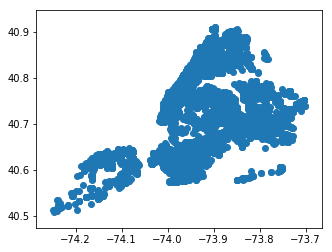

In [9]:
points.plot()

In [100]:
points['buffer500'] = points.geometry.buffer(152) #500-ft buffer

In [76]:
points.head()

,Longitude_WGS84,Latitude_WGS84,Id,bus_name,Building_ID_No,geometry,buffer500
0,-73.909377,40.824685,1500000US360050185001,PIZZA WORLD 163 ST,2113088,POINT (-73.90937699994538 40.824685),"POLYGON ((78.09062300005462 40.824685, 77.3587..."
1,-73.909377,40.824685,1500000US360050185001,RUNNING COOL II,2113088,POINT (-73.90937699994538 40.824685),"POLYGON ((78.09062300005462 40.824685, 77.3587..."
4,-73.909377,40.824685,1500000US360050185001,163 CHICKEN,2113088,POINT (-73.90937699994538 40.82468500000001),"POLYGON ((78.09062300005462 40.82468500000001,..."
5,-73.909377,40.824685,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088,POINT (-73.90937699994538 40.82468500000001),"POLYGON ((78.09062300005462 40.82468500000001,..."
11,-73.980657,40.779332,1500000US360610157005,UNCLE JACKS STEAKHOUSE MIDTOWN,0,POINT (-73.98065700003644 40.779332),"POLYGON ((78.01934299996356 40.779332, 77.2874..."


In [79]:
points[['Id', 'bus_name', 'Building_ID_No']]

,Id,bus_name,Building_ID_No
0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
1,1500000US360050185001,RUNNING COOL II,2113088
4,1500000US360050185001,163 CHICKEN,2113088
5,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088
11,1500000US360610157005,UNCLE JACKS STEAKHOUSE MIDTOWN,0
12,1500000US360610157005,WINE AND ROSES BAR AND CAFES,1030017
13,1500000US360610157005,UNCLE JACKS STEAKHOUSE MIDTOWN,1034848
16,1500000US360610157005,NABUCCO,1030007
19,1500000US360610033001,DAVIS K PARK ENTERPRISES,1002209
20,1500000US360610033001,VILPERS,1001658


In [101]:
poly = gpd.GeoDataFrame(points[['Id', 'bus_name', 'Building_ID_No']], 
                       geometry = points.buffer500)
poly.crs = '+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'



In [103]:
#join buffers with restaurant points 
test = gpd.sjoin(subway, poly, op='within')

In [184]:
points.shape

(14336, 7)

In [183]:
test.shape

(8763, 10)

In [104]:
test.head()

,line,name,objectid,url,geometry,index_right,Id,bus_name,Building_ID_No
3,2-5,Morris Park Ave & 180th St at NW corner,1737.0,http://web.mta.info/nyct/service/,POINT (-5799998.647563174 9853074.772479454),3179,1500000US360050240003,DEMI RESTAURANT,2110698
4,2-5,Boston Rd & 178th St at SW corner,1738.0,http://web.mta.info/nyct/service/,POINT (-5800132.402861771 9853936.433511501),14635,1500000US360050361003,CHEN BI RONG,2013281
6,2-5,Boston Rd & E Tremont Ave at NE corner,1740.0,http://web.mta.info/nyct/service/,POINT (-5800211.204638127 9853961.097033164),14635,1500000US360050361003,CHEN BI RONG,2013281
7,2-5,Boston Rd & 178th St at SE corner,1741.0,http://web.mta.info/nyct/service/,POINT (-5800161.921096674 9853926.809797814),14635,1500000US360050361003,CHEN BI RONG,2013281
8,2-5,Boston Rd & 178th St at NW corner,1742.0,http://web.mta.info/nyct/service/,POINT (-5800087.040727478 9853908.71801807),14635,1500000US360050361003,CHEN BI RONG,2013281


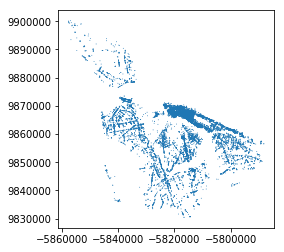

In [26]:
poly.plot()


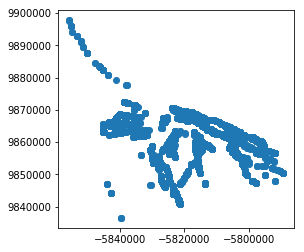

In [27]:
test.plot()

In [109]:
n_sub = test.groupby(['bus_name', 'Building_ID_No'])['name'].size().rename('n_subway_ent').reset_index()

In [106]:
n_sub.head()

,bus_name,Building_ID_No,n_subway_ent
0,1 AGUAPANELAS,4064657,3
1,1 TEA CAFE,3141388,1
2,100 LAFAYETTE STREET LTD,1002329,2
3,101 EAST 161ST RESTAURANT,2002919,3
4,101 W 55 TH ST REST,1023394,4


In [182]:
n_sub.shape

(2899, 3)

In [110]:
test2 = gpd.sjoin(points[''], poly, op='within')


In [112]:
test2[:20]

,Longitude_WGS84,Latitude_WGS84,Id_left,bus_name_left,Building_ID_No_left,geometry,buffer500,index_right,Id_right,bus_name_right,Building_ID_No_right
0,-73.909377,40.824685,1500000US360050185001,PIZZA WORLD 163 ST,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
1,-73.909377,40.824685,1500000US360050185001,RUNNING COOL II,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
4,-73.909377,40.824685,1500000US360050185001,163 CHICKEN,2113088,POINT (-5802974.288891593 9857680.653247522),POLYGON ((-5802822.288891593 9857680.653247522...,0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
5,-73.909377,40.824685,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088,POINT (-5802974.288891593 9857680.653247522),POLYGON ((-5802822.288891593 9857680.653247522...,0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
19847,-73.909377,40.824685,1500000US360050195002,FEEDING TREE STYLE,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,0,1500000US360050185001,PIZZA WORLD 163 ST,2113088
0,-73.909377,40.824685,1500000US360050185001,PIZZA WORLD 163 ST,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,1,1500000US360050185001,RUNNING COOL II,2113088
1,-73.909377,40.824685,1500000US360050185001,RUNNING COOL II,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,1,1500000US360050185001,RUNNING COOL II,2113088
4,-73.909377,40.824685,1500000US360050185001,163 CHICKEN,2113088,POINT (-5802974.288891593 9857680.653247522),POLYGON ((-5802822.288891593 9857680.653247522...,1,1500000US360050185001,RUNNING COOL II,2113088
5,-73.909377,40.824685,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088,POINT (-5802974.288891593 9857680.653247522),POLYGON ((-5802822.288891593 9857680.653247522...,1,1500000US360050185001,RUNNING COOL II,2113088
19847,-73.909377,40.824685,1500000US360050195002,FEEDING TREE STYLE,2113088,POINT (-5802974.288891596 9857680.653247522),POLYGON ((-5802822.288891596 9857680.653247522...,1,1500000US360050185001,RUNNING COOL II,2113088


In [113]:
n_rest500 = (test2
             .groupby(['bus_name_right', 'Building_ID_No_right'])['bus_name_right']
             .size()
             .rename('n_restaurants_500')
             .reset_index())

In [114]:
n_rest500.head()

,bus_name_right,Building_ID_No_right,n_restaurants_500
0,1 AGUAPANELAS,4064657,7
1,1 CHIMI SUSHI,1019865,17
2,1 EAST 66TH STREET,1041159,5
3,1 PANDA,1017884,8
4,1 PERRY ST RESTAURANT,1010939,12


In [116]:
n_rest500.columns = ['bus_name', 'Building_ID_No', 'n_restaurants_500']

In [181]:
n_rest500.shape

(14336, 3)

In [187]:
#combine 
rest_buffer = n_rest500.merge(n_sub, how='left')

In [188]:
rest_buffer.shape

(14336, 4)

In [189]:
rest_buffer.head()

,bus_name,Building_ID_No,n_restaurants_500,n_subway_ent
0,1 AGUAPANELAS,4064657,7,3.0
1,1 CHIMI SUSHI,1019865,17,NaN
2,1 EAST 66TH STREET,1041159,5,NaN
3,1 PANDA,1017884,8,NaN
4,1 PERRY ST RESTAURANT,1010939,12,NaN


In [192]:
rest_buffer.loc[rest_buffer.n_subway_ent.isnull(), 'n_subway_ent'] = 0

In [193]:
rest_buffer.to_pickle('restaurants_buffer')

In [194]:
rest_buffer.to_csv('restaurants_buffer.csv')

In [195]:
rest_buffer.head()

,bus_name,Building_ID_No,n_restaurants_500,n_subway_ent
0,1 AGUAPANELAS,4064657,7,3.0
1,1 CHIMI SUSHI,1019865,17,0.0
2,1 EAST 66TH STREET,1041159,5,0.0
3,1 PANDA,1017884,8,0.0
4,1 PERRY ST RESTAURANT,1010939,12,0.0


In [179]:
type(rest_buffer)

pandas.core.frame.DataFrame

In [122]:
#get rental prices 
bk = pd.read_csv('bk_condo_comp2010.csv', header=1)
bx = pd.read_csv('bx_condo_comp2010.csv', header=1)
mn = pd.read_csv('mn_ condo_comp2010.csv', header=1)
qn = pd.read_csv('qn_condo_comp2010.csv', header=1)
si = pd.read_csv('sicondos2009.csv', header=1)

In [123]:
bk.head()

,Boro-Block-Lot,Condominium Section,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Est. Gross Income,Gross Income per SqFt,...,Neighborhood.2,Building Classification.2,Total Units.2,Year Built.2,Gross SqFt.2,Est. Gross Income.2,Gross Income per SqFt.2,Full Market Value.2,Market Value per SqFt.2,Dist. from Coop in miles
0,3-00027-7501,658-R1,1 MAIN STREET,DOWNTOWN-FULTON FERRY,R4-ELEVATOR,124,1913,227916,4984800,21.87,...,BROOKLYN HEIGHTS,D6-ELEVATOR,137.0,1900.0,108780.0,2429803.0,22.34,10100000.0,93.0,0.35
1,3-00028-7501,1370-R1,31 WASHINGTON STREET,DOWNTOWN-FULTON FERRY,R4-ELEVATOR,13,2001,24672,556600,22.56,...,BROOKLYN HEIGHTS,D7-ELEVATOR,42.0,1921.0,31692.0,943532.0,29.80,4400000.0,139.0,0.55
2,3-00028-7502,2018-R1,133 WATER STREET,DOWNTOWN-FULTON FERRY,R4-ELEVATOR,69,2006,78352,1738800,22.19,...,BROOKLYN HEIGHTS,D7-ELEVATOR,94.0,1926.0,73032.0,1781214.0,24.39,7380000.0,101.0,0.95
3,3-00031-7502,1181-R1,50 BRIDGE STREET,DOWNTOWN-FULTON FERRY,R4-ELEVATOR,58,1904,52530,1044000,19.87,...,DOWNTOWN-FULTON FERRY,D7-ELEVATOR,59.0,2000.0,50457.0,1887773.0,37.40,8790000.0,174.0,0.20
4,3-00035-7501,1771-R1,4 WATER STREET,DOWNTOWN-FULTON FERRY,R4-ELEVATOR,13,2007,20085,580456,28.90,...,BROOKLYN HEIGHTS,D7-ELEVATOR,42.0,1921.0,31692.0,943532.0,29.80,4400000.0,139.0,0.45


In [37]:
def get_coord(address):
    full_address = address + ' ' + 'New York City'
    geolocator = Nominatim(user_agent="my_app3", timeout=7)
    try: 
        location = geolocator.geocode(full_address)
    except GeocoderTimedOut:
        return get_coord(full_address)
    if location is not None:   
        lat = float(location.raw['lat'])
        lon = float(location.raw['lon'])
        coord = {'lat':lat, 'lon':lon}
    else:
        coord = None
        
    return coord

In [38]:
get_coord('37 East 21 Street New York City')

In [151]:
bk_coords = bk.Address.apply(lambda x: get_coord(x + ' ' + 'New York City'))

GeocoderTimedOut: Service timed out

In [ ]:
coordinates_bk = []

In [170]:
for i in np.arange(500, 595):
    coordinates.append(get_coord(bk.Address[i]))


In [175]:
coordinates_bk = coordinates

# Find closest restaurant to a given address 

Need to add this code to the model.py script to use on my website 

In [7]:
from scipy.spatial import KDTree

In [8]:
points.head()

,Longitude_WGS84,Latitude_WGS84,Id,bus_name,Building_ID_No,geometry
0,-73.909377,40.824685,1500000US360050185001,PIZZA WORLD 163 ST,2113088,POINT (-5802974.288891596 9857680.653247522)
1,-73.909377,40.824685,1500000US360050185001,RUNNING COOL II,2113088,POINT (-5802974.288891596 9857680.653247522)
4,-73.909377,40.824685,1500000US360050185001,163 CHICKEN,2113088,POINT (-5802974.288891593 9857680.653247522)
5,-73.909377,40.824685,1500000US360050185001,TRIPLE A JAMAICAN RESTAURANT,2113088,POINT (-5802974.288891593 9857680.653247522)
11,-73.980657,40.779332,1500000US360610157005,UNCLE JACKS STEAKHOUSE MIDTOWN,0,POINT (-5810911.415347045 9866637.548673157)


In [89]:
#make a tree with restaurant coordinates 
tree = KDTree(points[['Longitude_WGS84', 'Latitude_WGS84']]) 


In [82]:
def get_coords(address):
    full_address = address + ' ' + 'New York City'
    geolocator= Nominatim(user_agent='my_app17', timeout=10000)
    location = geolocator.geocode(full_address)
    if location is None:
        return None 
    else:
        lat = float(location.raw['lat'])
        lon = float(location.raw['lon'])
        df = pd.DataFrame({'lon':lon, 'lat':lat}, index = np.arange(1))
        return df 

In [83]:
#get outside point 
address = '236 Sterling Street'
outside_coord = get_coords(address)
outside_coord

,lon,lat
0,-73.953081,40.66281


In [84]:
start = np.array(outside_coord)


In [85]:
start

array([[-73.95308098,  40.66281025]])

In [86]:
distance = tree.query(start, 1)

In [87]:
ind = distance[1]

In [88]:
points.iloc[ind]

,Longitude_WGS84,Latitude_WGS84,Id,bus_name,Building_ID_No,geometry
23145,-73.9503,40.660626,1500000US360470804001,1109 NOSTRAND AVE BAKERY,3106637,POINT (-5830938.042101377 9862165.459185204)


In [90]:
#make function 
def find_nearest_rest_index(address): 
    '''
    Returns the index of the nearest restaurant to the address given 
    Uses another custom function, get_coords (based on Geopy)
    '''
    outside_coord = get_coords(address)
    start = np.array(outside_coord)
    ind = tree.query(start, 1)[1]
    if ind is None: 
        return -1 
    else: 
        return ind

In [91]:
find_nearest_rest_index('236 Sterling Street')

array([13382])